In [ ]:
print("Hello world")

Hello world


In [ ]:
#Modules for EDA
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow import keras
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hcvdat0 (1).csv")
df.shape

(615, 14)

In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
df.isna().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
df.fillna(df.mean(),inplace=True)
df.describe()


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.775920,25.643955,25.448940,33.090690,19.673150,2.205657,1.123466,49.756166,54.661071,5.398234
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.900000,66.700000,23.000000,25.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


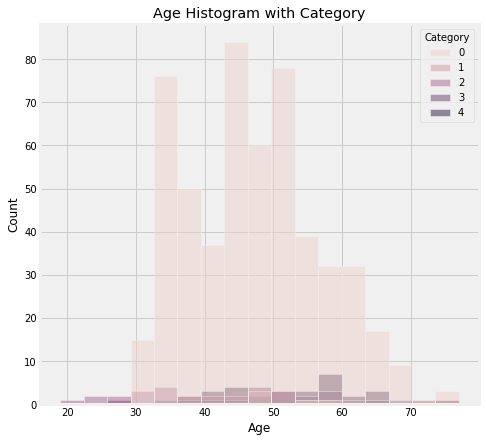

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Age Histogram with Category')
sns.histplot(df[['Age','Category']],x='Age',hue='Category', color= ['darkorchid', 'darkviolet'])
plt.show()

<Figure size 504x504 with 0 Axes>

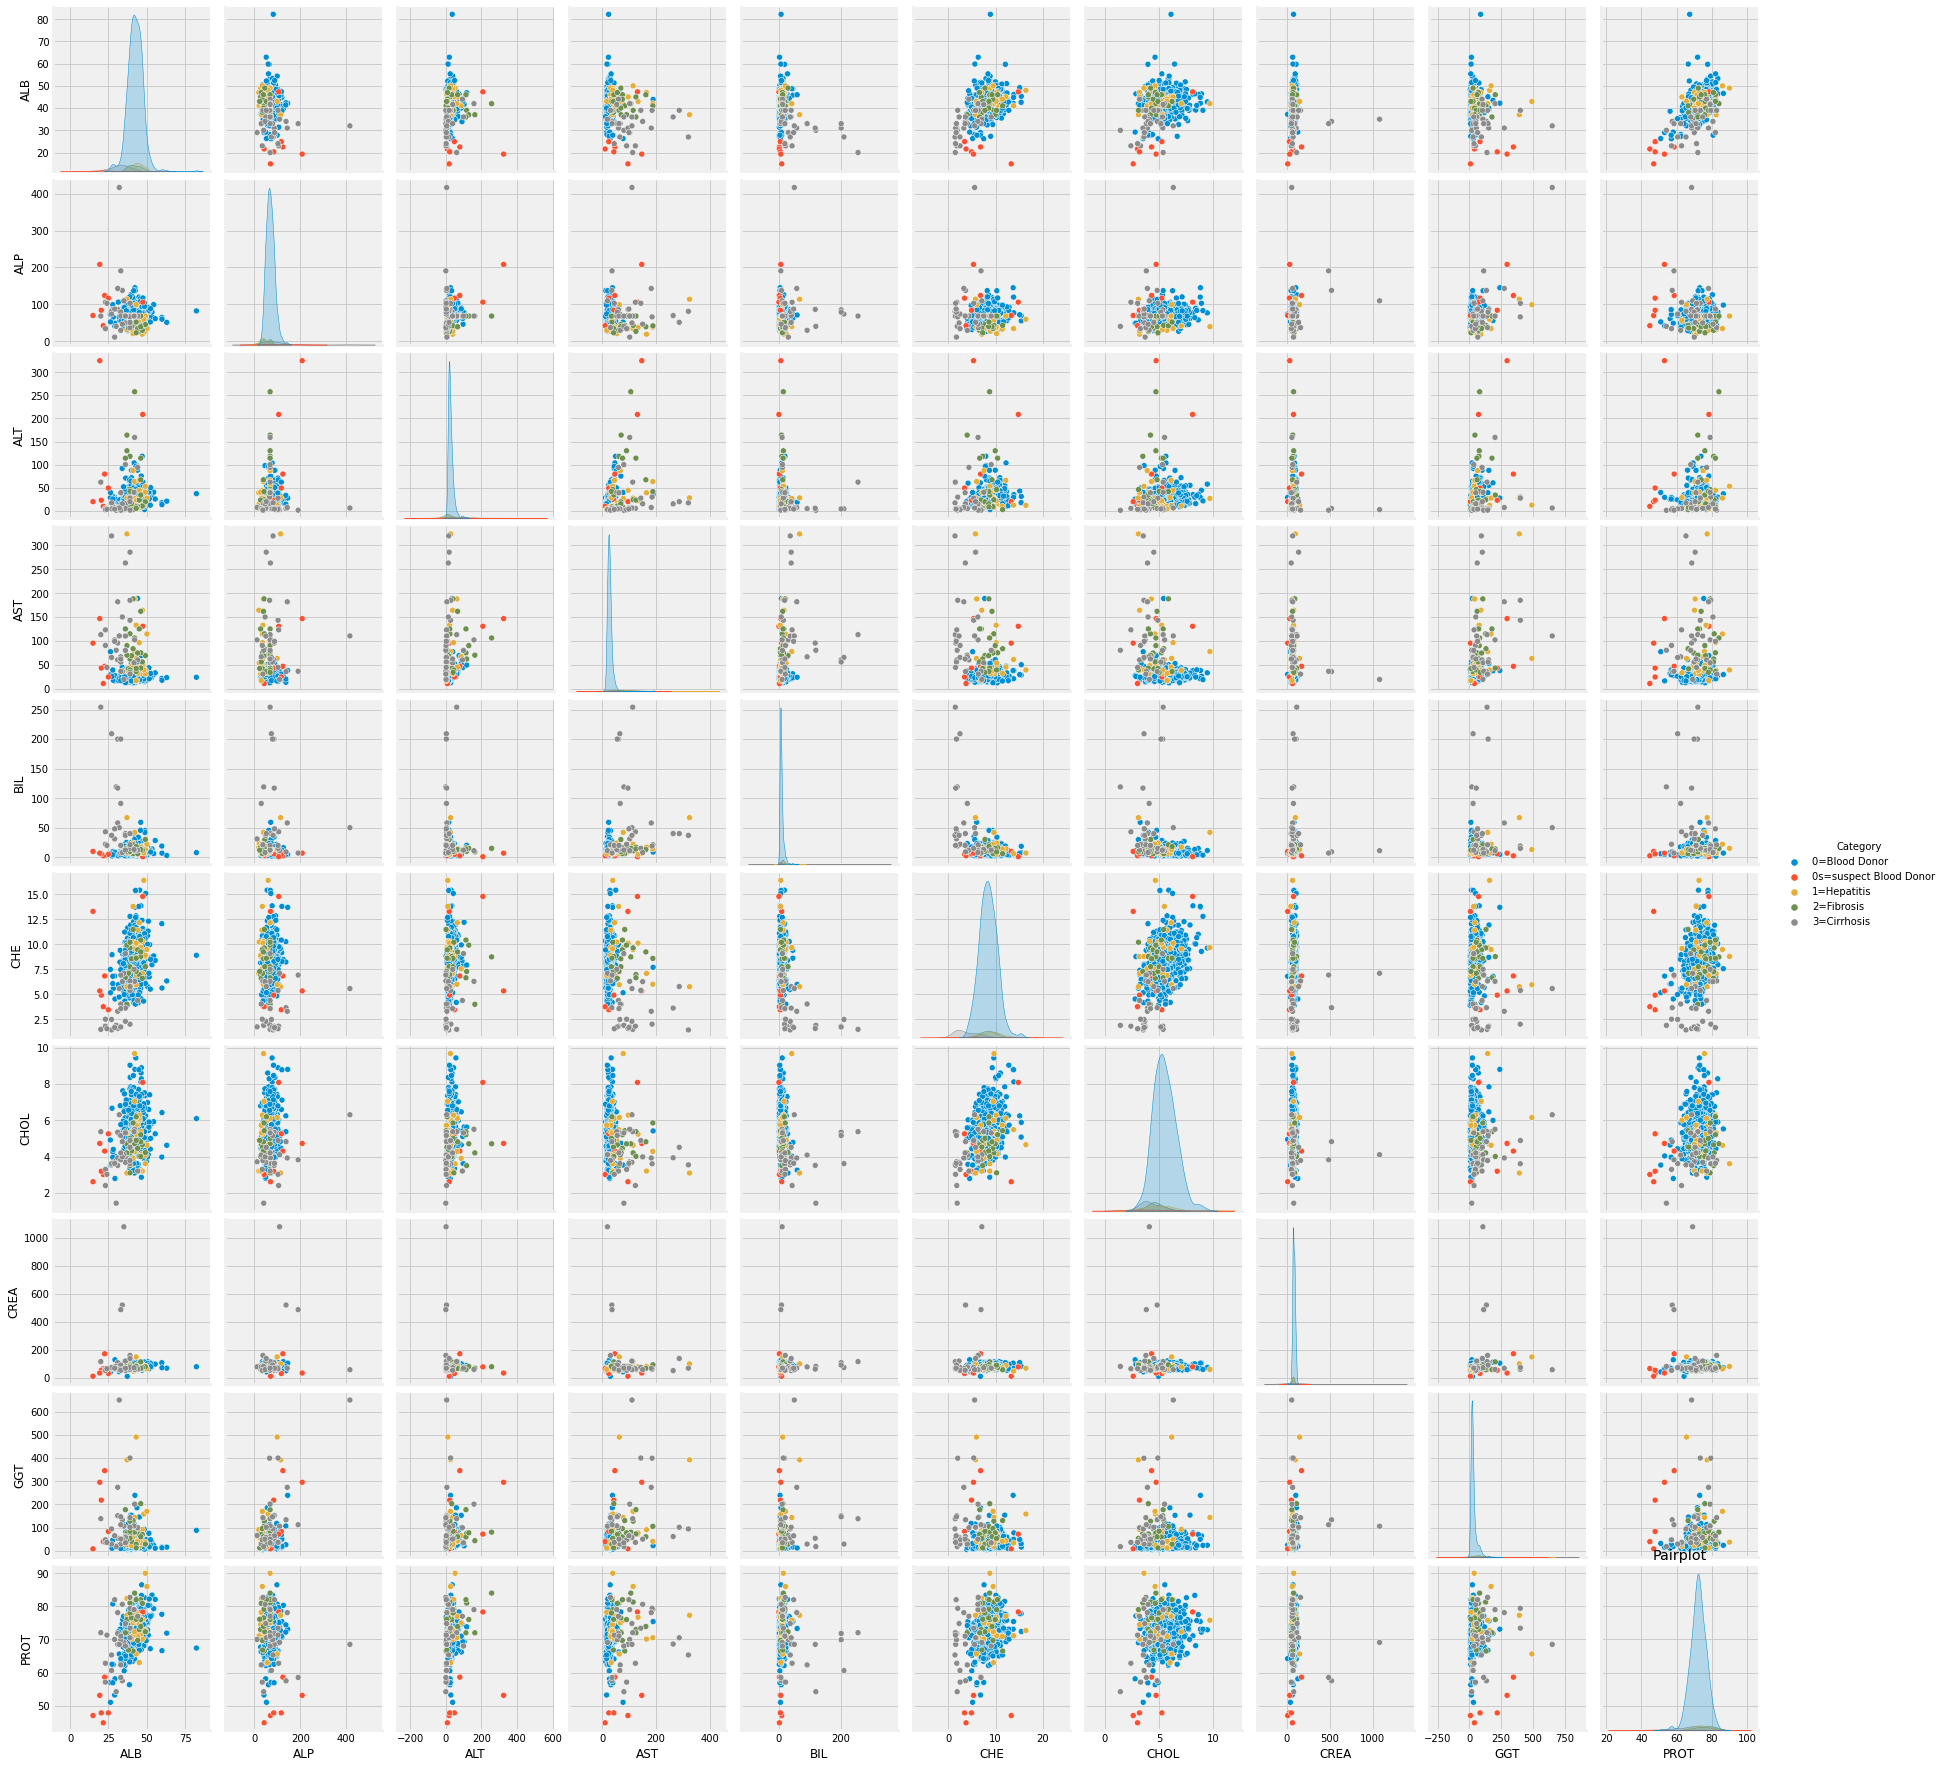

In [ ]:
plt.figure(figsize=(7,7))
sns.pairplot(data=df.drop(['Age','Sex'],axis=1),hue='Category')
plt.title('Pairplot')
plt.show()

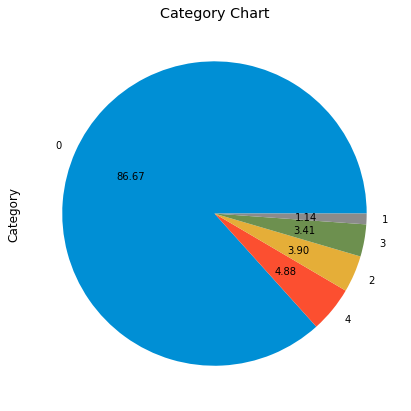

0    533
4     30
2     24
3     21
1      7
Name: Category, dtype: int64

In [ ]:
plt.figure(figsize=(7,7))
df['Category'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Category Chart')
plt.show()

df['Category'].value_counts()

In [ ]:
df.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [ ]:
replace_dict = dict()
num_dict = dict()
i=0
for val in df['Category'].unique():
    replace_dict[val] = i
    num_dict[str(i)] = val
    i += 1

In [ ]:
df['Category'].replace(replace_dict,inplace=True)
df.Category.unique()

array([0, 1, 2, 3, 4])

In [ ]:
df['Sex'].value_counts()

m    377
f    238
Name: Sex, dtype: int64

In [ ]:
df['Sex'].replace(['m','f'],[1,0],inplace=True)
df['Sex'].value_counts()

1    377
0    238
Name: Sex, dtype: int64

In [ ]:
x , y  = df.drop('Category',axis=1), df['Category'] ## Input variables = 12
x1, y1 = df.drop(['Category', 'CREA', 'CHOL', 'GGT'], axis = 1), df['Category'] ## Input variables = 9
x2, y2 = df.drop(['Category' , 'Age', 'ALB', 'ALP', 'ALT', 'CHE', 'CHOL', 'CREA', 'PROT'], axis = 1), df['Category'] ## Input variables = 4
x3, y3 = df.drop(['Category', 'Age'], axis = 1), df['Category'] ## Input variables = 11
x4, y4 = df.drop(['Category', 'ALP', 'ALT', 'GGT', 'CHOL'], axis = 1), df['Category'] ## Input variables = 8

In [ ]:
smote = SMOTE()
x , y  = smote.fit_resample(x , y )
x1, y1 = smote.fit_resample(x1, y1)
x2, y2 = smote.fit_resample(x2, y2)
x3, y3 = smote.fit_resample(x3, y3)
x4, y4 = smote.fit_resample(x4, y4)

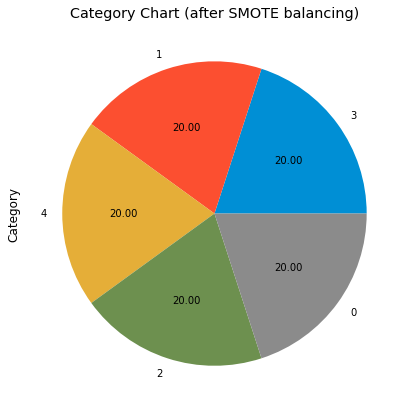

3    533
1    533
4    533
2    533
0    533
Name: Category, dtype: int64

In [ ]:
plt.figure(figsize=(7,7))
y.value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Category Chart (after SMOTE balancing)')
plt.show()
y.value_counts()

In [ ]:
cols_to_scale = x.drop('Sex',axis=1).columns
cols_to_scale_1 = x1.drop('Sex',axis=1).columns
cols_to_scale_2 = x2.drop('Sex',axis=1).columns
cols_to_scale_3 = x3.drop('Sex',axis=1).columns
cols_to_scale_4 = x4.drop('Sex',axis=1).columns

cols_to_scale


Index(['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
       'PROT'],
      dtype='object')

In [ ]:
cols_to_scale_1

Index(['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'PROT'], dtype='object')

In [ ]:
cols_to_scale_2

Index(['AST', 'BIL', 'GGT'], dtype='object')

In [ ]:
cols_to_scale_3

Index(['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
       'PROT'],
      dtype='object')

In [ ]:
cols_to_scale_4

Index(['Age', 'ALB', 'AST', 'BIL', 'CHE', 'CREA', 'PROT'], dtype='object')

In [ ]:
scale = MinMaxScaler()
scaled = scale.fit_transform(x[cols_to_scale])
scaled_1 = scale.fit_transform(x1[cols_to_scale_1])
scaled_2 = scale.fit_transform(x2[cols_to_scale_2])
scaled_3 = scale.fit_transform(x3[cols_to_scale_3])
scaled_4 = scale.fit_transform(x4[cols_to_scale_4])

In [ ]:
i = 0
for col in cols_to_scale:
    x[col] = scaled[:,i]
    i += 1


i = 0
for col in cols_to_scale_1:
    x1[col] = scaled[:,i]
    i += 1

i = 0
for col in cols_to_scale_1:
    x2[col] = scaled[:,i]
    i += 1

i = 0
for col in cols_to_scale_1:
    x3[col] = scaled[:,i]
    i += 1

i = 0
for col in cols_to_scale_1:
    x4[col] = scaled[:,i]
    i += 1

In [ ]:
x.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0.224138,1,0.350669,0.101653,0.020962,0.036694,0.026461,0.367578,0.218447,0.091495,0.011757,0.535398
1,0.224138,1,0.350669,0.145571,0.052713,0.044990,0.012243,0.650434,0.408981,0.061619,0.017172,0.701327
2,0.224138,1,0.475483,0.156427,0.108816,0.134014,0.020932,0.494997,0.457524,0.072822,0.044400,0.763274
3,0.224138,1,0.420505,0.100419,0.091554,0.038290,0.071485,0.394263,0.401699,0.067221,0.045328,0.683628
4,0.224138,1,0.361070,0.154947,0.097719,0.045310,0.034755,0.515677,0.350728,0.063486,0.039295,0.528761


In [ ]:
x1.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,PROT
0,0.224138,1,0.350669,0.101653,0.020962,0.036694,0.026461,0.367578,0.218447
1,0.224138,1,0.350669,0.145571,0.052713,0.044990,0.012243,0.650434,0.408981
2,0.224138,1,0.475483,0.156427,0.108816,0.134014,0.020932,0.494997,0.457524
3,0.224138,1,0.420505,0.100419,0.091554,0.038290,0.071485,0.394263,0.401699
4,0.224138,1,0.361070,0.154947,0.097719,0.045310,0.034755,0.515677,0.350728


In [ ]:
x2.head()

,Sex,AST,BIL,GGT,Age,ALB,ALP,ALT,CHE,PROT
0,1,0.036694,0.026461,12.1,0.224138,0.350669,0.101653,0.020962,0.367578,0.218447
1,1,0.044990,0.012243,15.6,0.224138,0.350669,0.145571,0.052713,0.650434,0.408981
2,1,0.134014,0.020932,33.2,0.224138,0.475483,0.156427,0.108816,0.494997,0.457524
3,1,0.038290,0.071485,33.8,0.224138,0.420505,0.100419,0.091554,0.394263,0.401699
4,1,0.045310,0.034755,29.9,0.224138,0.361070,0.154947,0.097719,0.515677,0.350728


In [ ]:
x3.head()

,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Age
0,1,0.350669,0.101653,0.020962,0.036694,0.026461,0.367578,3.23,106.0,12.1,0.218447,0.224138
1,1,0.350669,0.145571,0.052713,0.044990,0.012243,0.650434,4.80,74.0,15.6,0.408981,0.224138
2,1,0.475483,0.156427,0.108816,0.134014,0.020932,0.494997,5.20,86.0,33.2,0.457524,0.224138
3,1,0.420505,0.100419,0.091554,0.038290,0.071485,0.394263,4.74,80.0,33.8,0.401699,0.224138
4,1,0.361070,0.154947,0.097719,0.045310,0.034755,0.515677,4.32,76.0,29.9,0.350728,0.224138


In [ ]:
x4.head()

,Age,Sex,ALB,AST,BIL,CHE,CREA,PROT,ALP,ALT
0,0.224138,1,0.350669,0.036694,0.026461,0.367578,106.0,0.218447,0.101653,0.020962
1,0.224138,1,0.350669,0.044990,0.012243,0.650434,74.0,0.408981,0.145571,0.052713
2,0.224138,1,0.475483,0.134014,0.020932,0.494997,86.0,0.457524,0.156427,0.108816
3,0.224138,1,0.420505,0.038290,0.071485,0.394263,80.0,0.401699,0.100419,0.091554
4,0.224138,1,0.361070,0.045310,0.034755,0.515677,76.0,0.350728,0.154947,0.097719


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1865, 12), (800, 12), (1865,), (800,))

Feature: 0, Score: 0.16290
Feature: 1, Score: 0.10584
Feature: 2, Score: 0.02670
Feature: 3, Score: 0.03131
Feature: 4, Score: 0.09062
Feature: 5, Score: 0.11410
Feature: 6, Score: 0.01705
Feature: 7, Score: 0.15550
Feature: 8, Score: 0.06070
Feature: 9, Score: 0.01137
Feature: 10, Score: 0.06520
Feature: 11, Score: 0.19592


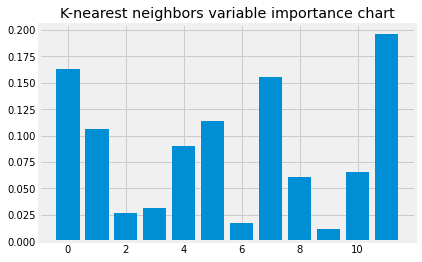

In [ ]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset

# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(x_train, y_train)
# perform permutation importance
results = permutation_importance(model, x_train, y_train, scoring='accuracy')
# get importance
importance_perm = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance_perm):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_perm))], importance_perm)
pyplot.title("K-nearest neighbors variable importance chart")
pyplot.show()

Feature: 0, Score: 0.08570
Feature: 1, Score: 0.00246
Feature: 2, Score: 0.19080
Feature: 3, Score: 0.06283
Feature: 4, Score: 0.08615
Feature: 5, Score: 0.19636
Feature: 6, Score: 0.20628
Feature: 7, Score: 0.03196
Feature: 8, Score: 0.03922
Feature: 9, Score: 0.04287
Feature: 10, Score: 0.03366
Feature: 11, Score: 0.02170


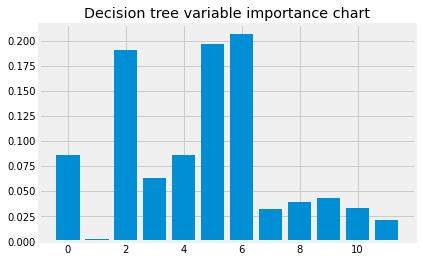

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(x_train, y_train)
# get importance
importance_decisiontree = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_decisiontree):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_decisiontree))], importance_decisiontree)
pyplot.title("Decision tree variable importance chart")
pyplot.show()

Feature: 0, Score: 0.07453
Feature: 1, Score: 0.01139
Feature: 2, Score: 0.13699
Feature: 3, Score: 0.07957
Feature: 4, Score: 0.07338
Feature: 5, Score: 0.14829
Feature: 6, Score: 0.12492
Feature: 7, Score: 0.09894
Feature: 8, Score: 0.04326
Feature: 9, Score: 0.04730
Feature: 10, Score: 0.06548
Feature: 11, Score: 0.09596


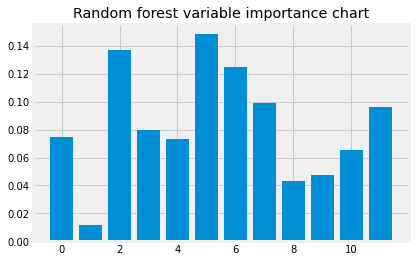

In [ ]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(x_train, y_train)
# get importance
importance_randomforest = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_randomforest):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_randomforest))], importance_randomforest)
pyplot.title("Random forest variable importance chart")
pyplot.show()

In [ ]:
## "Feature Selection Score"
print(importance_perm.reshape(12,1).shape)
#print(importance_logis.reshape(12,1).shape)
print(importance_decisiontree.reshape(12,1).shape)
print(importance_randomforest.reshape(12,1).shape)

for i in range(12):
  print( (importance_perm[i] + importance_decisiontree[i] + importance_randomforest[i]) / 3) 

## Based on this, the least important variables are: SEX (0.027037905621549427), GGT (0.03516103656751034), CHOL (0.03520476997837704), CREA (0.03535640064877726), ALP (0.0492703181385062), ALT (0.05762919444294043)

(12, 1)
(12, 1)
(12, 1)
0.10770947635466771
0.03989632374876976
0.11816277579941716
0.05790419266882033
0.08338147526141615
0.15291713605933596
0.11608543460118827
0.09546399895371337
0.04772722579894203
0.033844343496945296
0.054781737475094495
0.1045298118639057


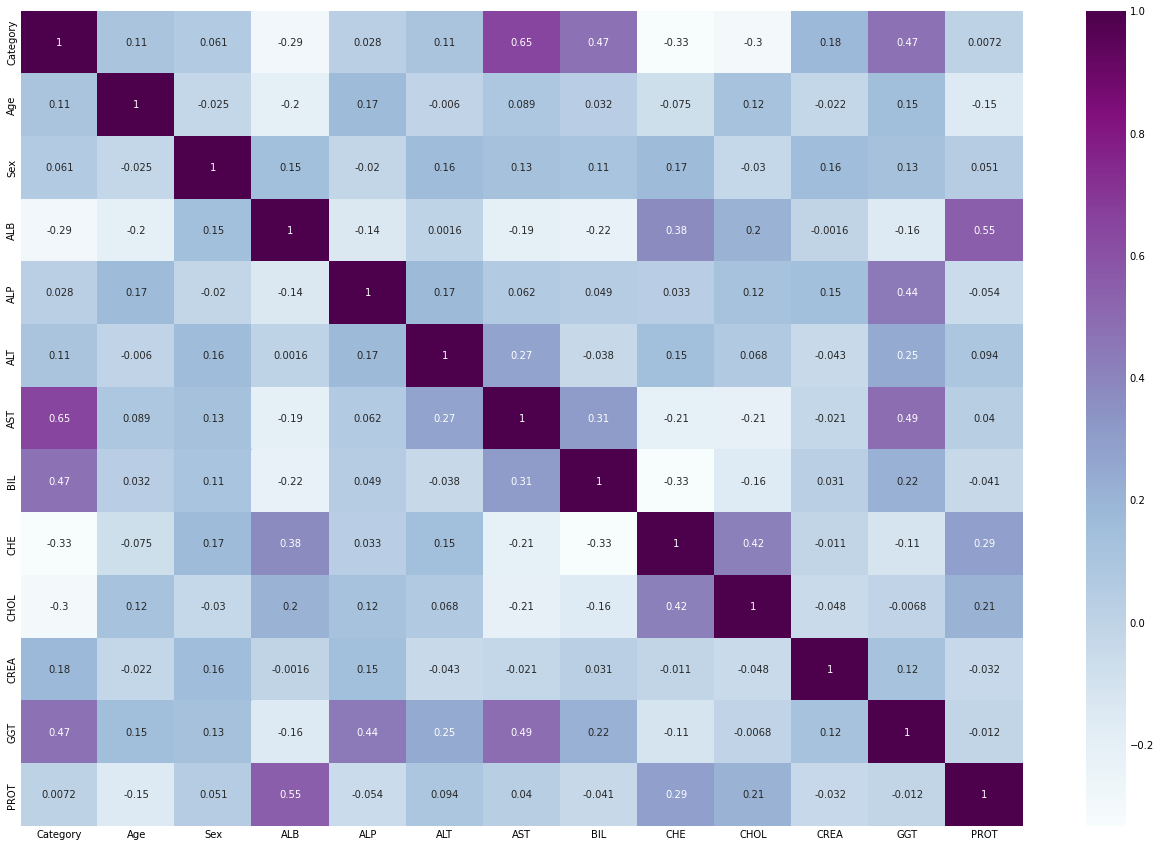

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True, cmap = 'BuPu')
plt.show()

## Mostly correlated with AST, BIL, and GGT

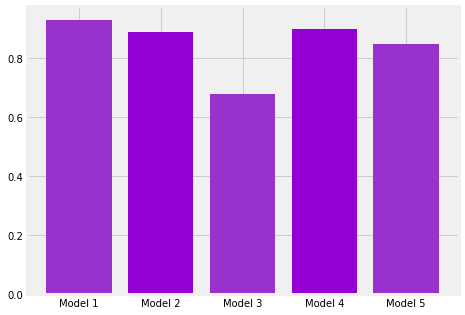

In [ ]:


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
F1_Scores = [0.93, 0.89, 0.68, 0.90, 0.85]
ax.bar(Models, F1_Scores, color=['darkorchid', 'darkviolet'])
plt.show()

In [ ]:
!pip install kora -q
from kora import drive
drive.link_nbs()

In [ ]:
!pip install import-ipynb
import import_ipynb

In [ ]:
import Model
import Model1
import Model2
import Model4

In [ ]:
import Model3STA401

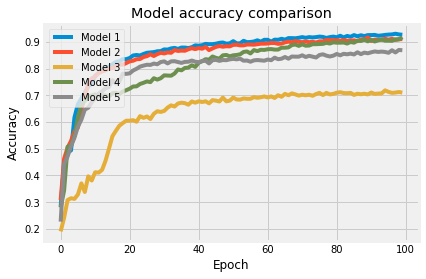

In [ ]:
## Plotting model accuracies against each other over time
plt.plot(Model.history.history['accuracy'])
plt.plot(Model1.history1.history['accuracy'])
plt.plot(Model2.history2.history['accuracy'])
plt.plot(Model3STA401.history3.history['accuracy'])
plt.plot(Model4.history4.history['accuracy'])

plt.title('Model accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], loc='upper left')
plt.show()